> # **CUSTOMER CHURN PREDICTION USING ARTIFICIAL NEURAL NETWORK (ANN)**
> 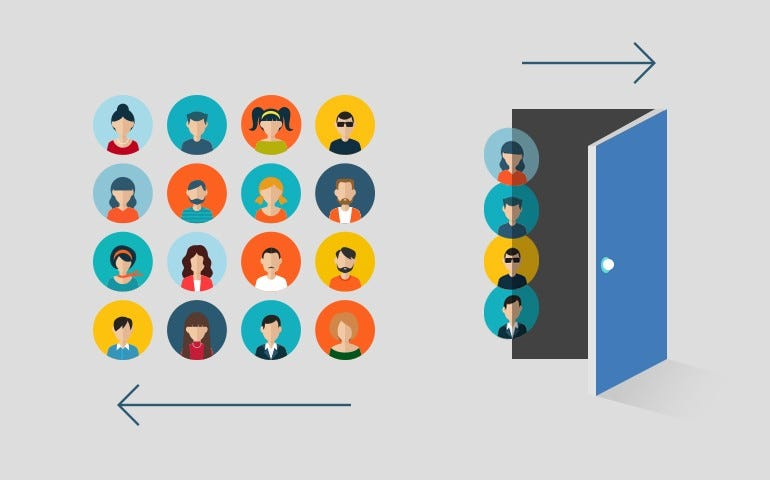
<br><br>
> ### FEATURES OVERVIEW
> - `CreditScore`: A numerical value representing the customer's creditworthiness.
> - `Geography`: The geographical location or region where the customer resides.
> - `Tenure`: The number of years the customer has been with the bank.
> - `Balance`: The current account balance of the customer.
> - `NumOfProducts`: The number of bank products the customer holds.
> - `HasCrCard`: A binary indicator of whether the customer has a credit card (1 for yes, 0 for no).
> - `IsActiveMember`: A binary indicator of whether the customer is an active member of the bank (1 for yes, 0 for no).
> - `EstimatedSalary`: The estimated annual salary of the customer.
> - `Exited`: A binary indicator of whether the customer has exited or left the bank (1 for yes, 0 for no).
<br><br>
> In this tutorial we are going to see how to build an `ARTIFICIAL NEURAL NETWORK (ANN)` using `Tensorflow` and `Keras` for `customer churn prediction`.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<hr>

> ### DATA PREPROCESSING 
> - Feature Selection - Dropped `'RowNumber','CustomerId', 'Surname'` features
> - One Hot Encoding - Categorical Features - `'Geography', 'Gender'`
> - Feature Scaling - Input Features

In [3]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [4]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype='int64')

In [5]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<hr>

> ### ARTIFICIAL NEURAL NETWORK ARCHITECTURE
> This artificial neural network (ANN) consists of three layers: 
> - The first hidden layer with 11 neurons and ReLU activation.
> - The second hidden layer also with 11 neurons and ReLU activation.
> - Final output layer with a single neuron and a sigmoid activation function.

> The ReLU activation functions introduce non-linearity and help the network learn complex patterns, while the sigmoid function in the output layer produces a probability score between 0 and 1, making it suitable for binary classification tasks. The input_dim = 11 specifies that the input layer expects 11 features.

In [7]:
model = Sequential()

model.add(Dense(11, activation = 'sigmoid', input_dim = 11)) # Hidden layer 1st
model.add(Dense(11, activation = 'sigmoid'))                 # Hidden layer 2nd
model.add(Dense(1, activation = 'sigmoid'))                  # Output layer

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

> ### ANN CONFIGURATIONS
> The compile method configures the model for training by specifying the optimizer, loss function, and evaluation metrics:
> - `Optimizer ('Adam')`: Defines the algorithm used to update the model's weights based on the gradients computed during training. Adam (Adaptive Moment Estimation) is a popular choice due to its adaptive learning rate properties and efficiency.
> - `Loss Function ('binary_crossentropy')`: Specifies how the model's predictions are evaluated against the true labels. Binary cross-entropy is used for binary classification problems to measure the performance of the model in terms of how well it predicts the class probabilities.
> - `Metrics (['accuracy'])`: Determines which metrics will be used to evaluate the model's performance during training and testing. Accuracy is used here to track the proportion of correct predictions made by the model.

> By calling compile, you set up the necessary components for training the model, enabling it to learn from data and optimize its performance.

In [8]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

> ### MODEL TRAINING, PREDICTION AND ACCURACY
> The prediction is in terms of `Probability` so we have to convert them into binary classes as 0 or 1

In [9]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 0, validation_split = 0.2)

In [10]:
y_pred = np.where(model.predict(X_test) >= 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
accuracy_score(y_test, y_pred)

0.859

<hr>

> ### MODEL EVALUATION & ANALYSIS OF LOSS AND ACCURACY
> The `history` object records the values of metrics and loss for each epoch based on the configurations specified in the `compile` method.

In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

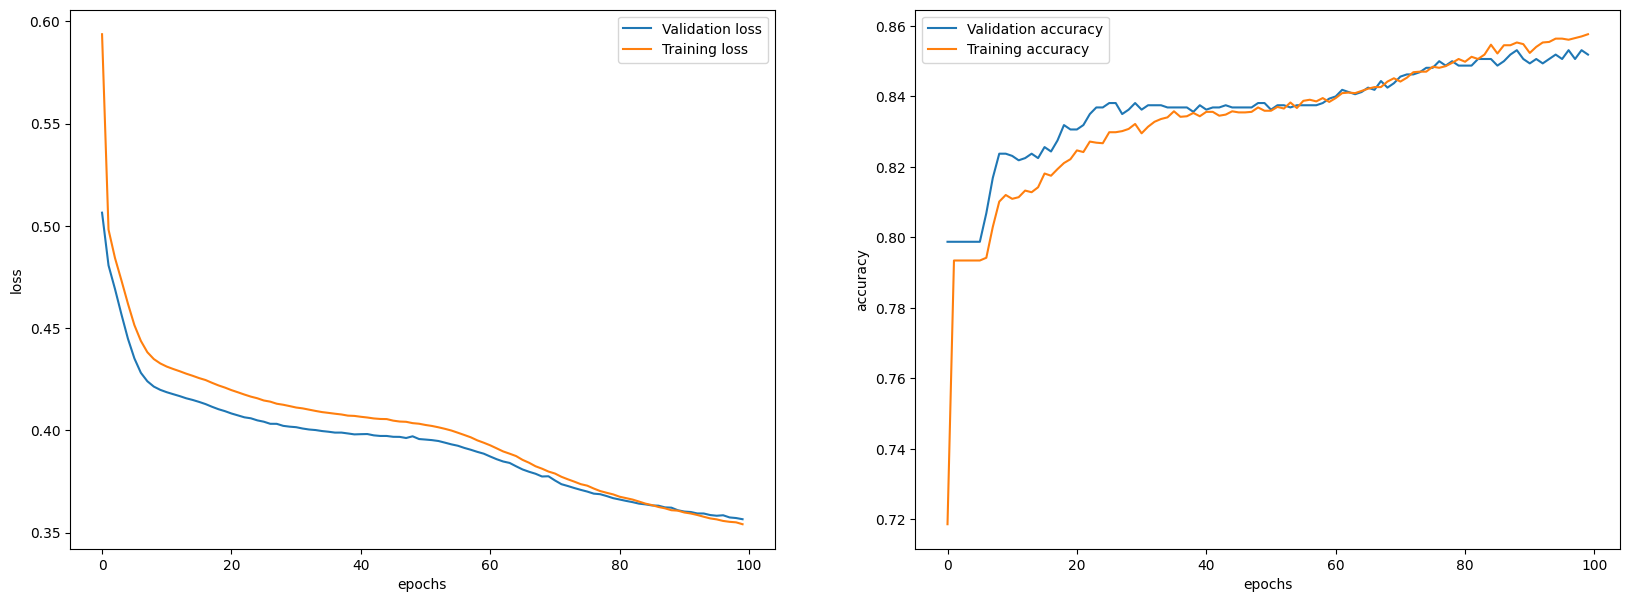

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

fig.set_figwidth(20)
fig.set_figheight(7)

ax[0].plot(history.history['val_loss'], label = 'Validation loss')
ax[0].plot(history.history['loss'], label = 'Training loss')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(history.history['val_accuracy'], label = 'Validation accuracy')
ax[1].plot(history.history['accuracy'], label = 'Training accuracy')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')

fig.show()